In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('../../data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
cat_df = df.iloc[:,[1,2,5,6,8,10,11,12, 13]]
cat_df

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [7]:
dataSet = np.array(
[[1, 1, 1],
 [1, 1, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]])

test_df = pd.DataFrame()
test_df['No Surfacing'] = dataSet[:,0]
test_df['Flippers'] = dataSet[:,1]
test_df['target'] = ['yes','yes','no','no','no']

In [8]:
def calculate_shannon_entropy(data):
    n = len(data)
    label_counts = np.array(list(Counter(data['target']).values()))
    probability = label_counts / n
    log_prob = np.log2(probability)
    shannon_ent = np.sum(probability * log_prob * -1)
    return shannon_ent

    
    
calculate_shannon_entropy(test_df)

0.9709505944546686

In [9]:
def split_dataset(data, feature, value):
    retdata = data.copy()
    split_feature = retdata.pop(feature)
    mask = split_feature == value
    return retdata[mask]

split_dataset(cat_df, 'fbs', 1)

,sex,cp,restecg,exang,slope,ca,thal,target
0,1,3,0,0,0,0,1,1
8,1,2,1,0,2,0,3,1
14,0,3,0,0,2,0,2,1
23,1,2,1,1,1,0,2,1
26,1,2,1,0,2,0,2,1
28,0,2,0,0,2,1,2,1
29,1,2,0,0,0,0,2,1
36,0,2,1,0,2,0,2,1
60,0,2,0,0,2,1,2,1
64,1,2,0,0,2,0,2,1


In [11]:
def choose_feature(data):
    base_entropy = calculate_shannon_entropy(data)
    best_info_gain = 0.0
    best_feature = -1.0
    for feature in data.columns[0:-1]:
        new_entropy = 0.0
        unique_val = set(data[feature])
        for val in unique_val:
            sub_data = split_dataset(data, feature, val)
            prob = len(sub_data) / float(len(data))
            new_entropy += prob * calculate_shannon_entropy(sub_data)
        info_gain = base_entropy - new_entropy
#         print('info_gain: {}'.format(info_gain))
        if info_gain >= best_info_gain:
            best_info_gain = info_gain
            best_feature = feature
#     print('best_info_gain: {}'.format(best_info_gain))
    print(best_feature)
    return best_feature

choose_feature(cat_df)

thal


'thal'

In [ ]:
def majority(class_list):
    label_counts = Counter(class_list).most_common()
    return label_counts[0][0]





majority(cat_df['target'])

In [5]:
def create_tree(data):
    class_list = list(data['target'])
    if  class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    if data.shape[1] == 1:
#         print('hello')
        return majority(class_list)
    best_feature_label = choose_feature(data)
    mytree = {best_feature_label:{}}
    feature_value = data[best_feature_label]
    unique_val = set(feature_value)
    for val in unique_val:
#         print(best_feature_label)
#         print(val)
        mytree[best_feature_label][val] = create_tree(split_dataset(data, best_feature_label, val))
    return mytree
        
    
tree = create_tree(cat_df)
tree

NameError: name 'cat_df' is not defined

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=0, criterion = 'entropy', min_samples_leaf = 10)
train_df = df.copy()
cat_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
for col in cat_columns:
    train_df[col] = train_df[col].astype(np.object)

target = train_df.pop('target')
clf = clf.fit(train_df.values, target.values)

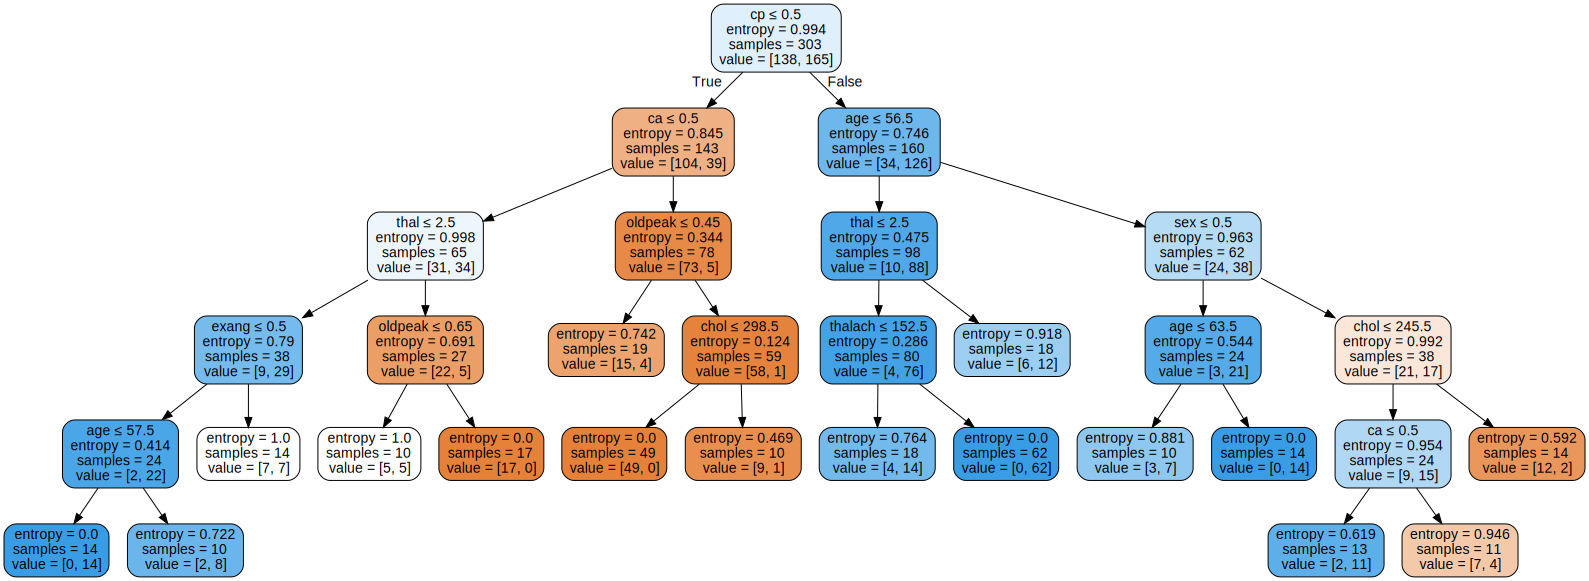

In [4]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(train_df.columns),    
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("heart")
graph